In [84]:
# run this cell to setup matplotlib, and also import the very important take_picture function from camera!
%matplotlib notebook
import matplotlib.pyplot as plt
from camera import take_picture
import numpy as np
import cv2

In [85]:
from facenet_models import FacenetModel

# this will download the pretrained weights for MTCNN and resnet
# (if they haven't already been fetched)
# which should take just a few seconds
model = FacenetModel()

## Importing Face 1

pic shape: (638, 610, 3)


<IPython.core.display.Javascript object>


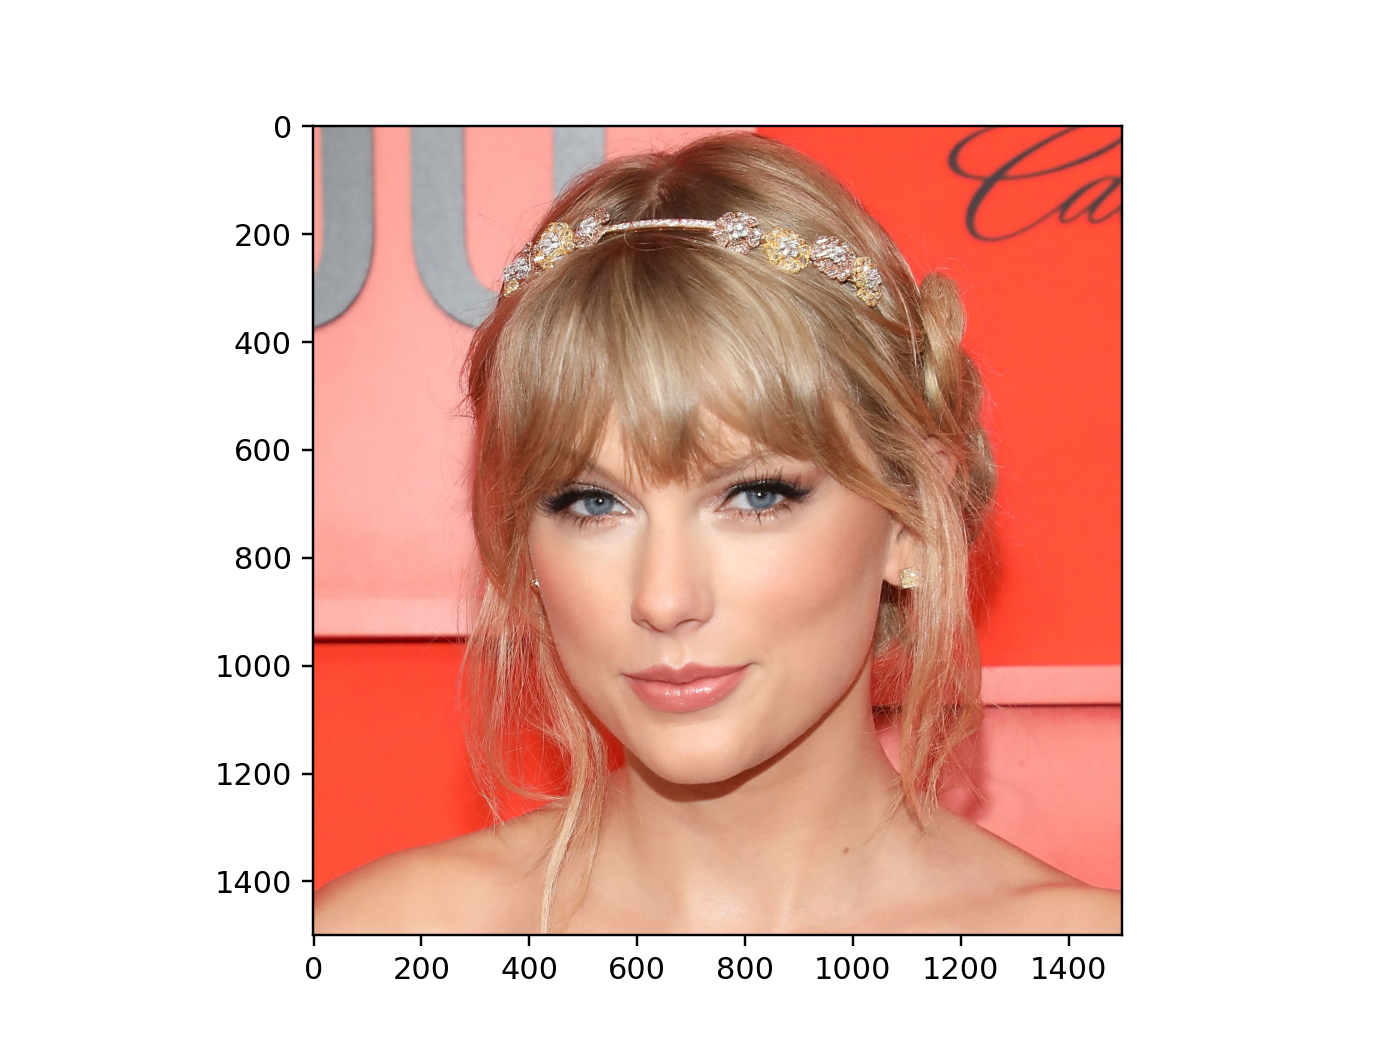

In [86]:
pic = cv2.imread("database/CG/1.jpg")[:,:,::-1] # The slicing part converts the BGR image to RGB
#cv2.imshow("test", pic) # Will have a window pop-up of the image. Press any key to continue
#cv2.waitKey(0)
#cv2.destroyAl|lWindows()
print("pic shape:", pic.shape)
plt.imshow(pic)

In [88]:
# detect all faces in an image
# returns a tuple of (boxes, probabilities, landmarks)
# assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)
#
# If N faces are detected then arrays of N boxes, N probabilities, and N landmark-sets
# are returned.
boxes, probabilities, landmarks = model.detect(pic)

print(f"Number of faces detected: {len(boxes)}")
print("Probabilities:", probabilities)

Number of faces detected: 1
Probabilities: [0.9997851]


<IPython.core.display.Javascript object>


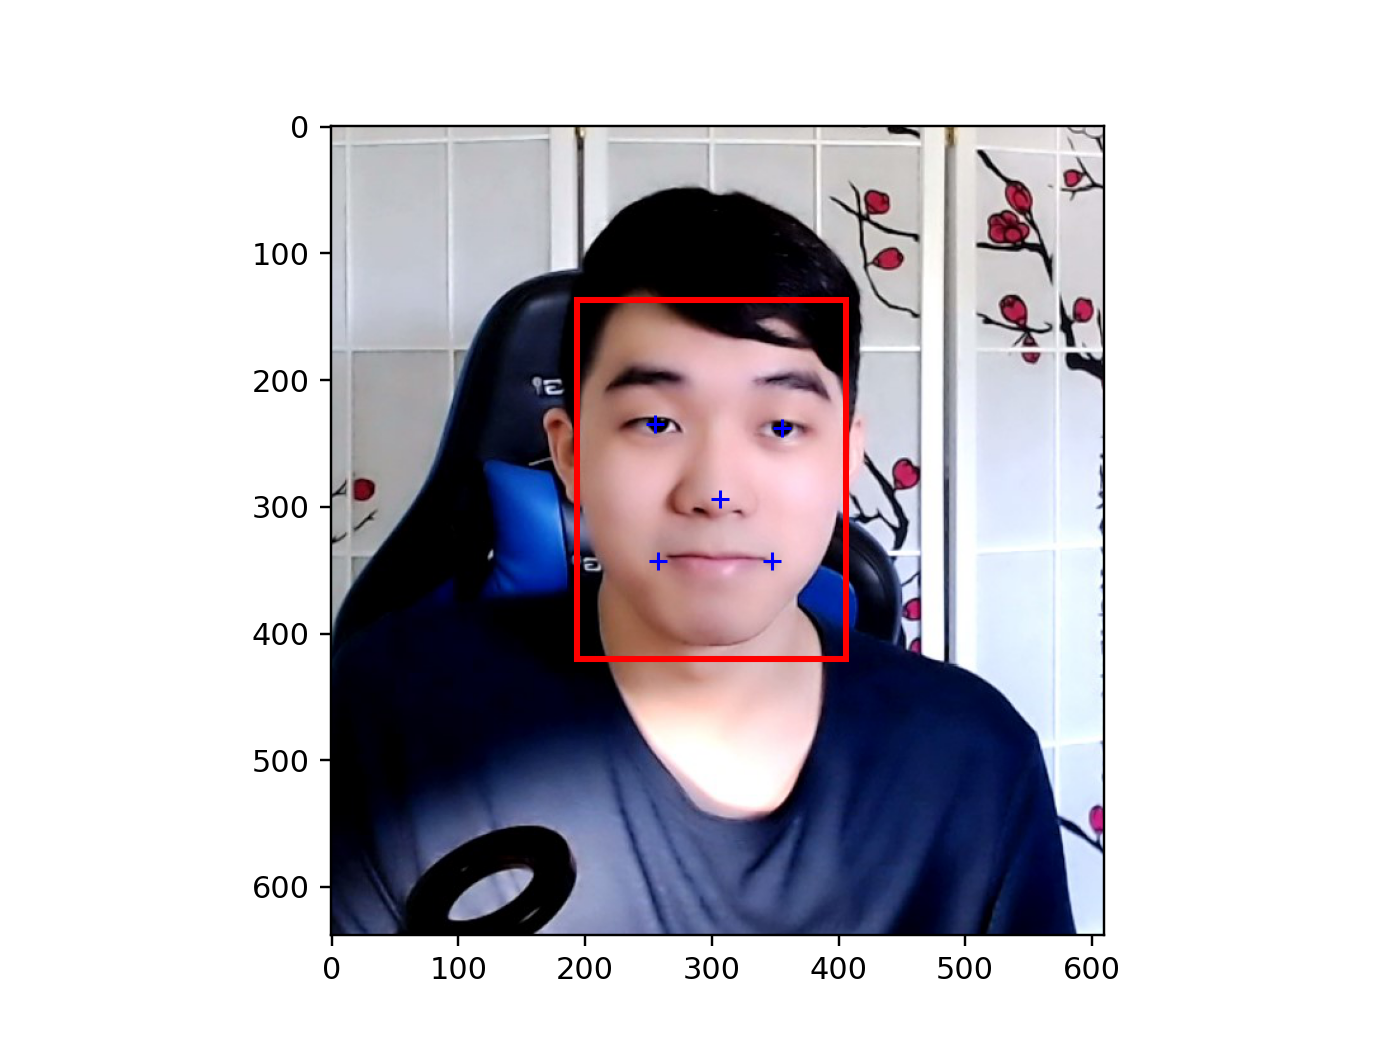

In [93]:
# SHOWING FACE RECTANGLES
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.imshow(pic)


for box, prob, landmark in zip(boxes, probabilities, landmarks):
    # draw the box on the screen
    ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))

    # Get the landmarks/parts for the face in box d.
    # Draw the face landmarks on the screen.
    for i in range(len(landmark)):
        ax.plot(landmark[i, 0], landmark[i, 1], "+", color="blue")

In [94]:
# let's take a look as to what the descriptor is!!
descriptor = model.compute_descriptors(pic, boxes) # Producing the descriptor vector
descriptor = descriptor.reshape(512)
print(descriptor.shape)
print(descriptor)

(512,)
[ 0.00529921 -0.03051496 -0.00658576  0.01186249  0.04002044  0.04101001
 -0.06994822 -0.02161925  0.01228619  0.04090874  0.04649618  0.04063784
 -0.01774635 -0.03245047 -0.0047139  -0.04457016  0.00558801  0.03058005
 -0.06404127  0.03380337 -0.00149453  0.0230107   0.02824214 -0.06764708
 -0.05921683  0.09312854  0.01074942 -0.00398343 -0.03274785 -0.02250898
  0.00103799  0.09751364  0.02020827  0.0818325  -0.00688187 -0.0337746
 -0.06482516 -0.09070695 -0.10802888  0.05355441  0.01078117 -0.06215414
 -0.0452884  -0.03406265 -0.0501838  -0.00036502  0.03743869  0.03579701
 -0.04950786 -0.06528178 -0.00644979 -0.03901639  0.08111954  0.04470817
  0.05009462 -0.00141065 -0.06099593  0.0718719   0.02330993  0.01932468
 -0.01025291  0.03121941 -0.05665761  0.02588744  0.02403626  0.00409588
 -0.03753029 -0.05974448 -0.03102179 -0.00110206  0.001468   -0.00536998
 -0.00430819  0.02680263  0.03396454  0.01865805 -0.04060009 -0.01220845
  0.01930791  0.00030564  0.04205614 -0.00215

## Importing Face 2

In [115]:
#pic2 = cv2.imread("database/TS/3.jpg")[:,:,::-1] # The slicing part converts the BGR image to RGB
pic2 = cv2.imread("test-photos/chris_test_image.jpg")[:,:,::-1] # The slicing part converts the BGR image to RGB
#cv2.imshow("test", pic) # Will have a window pop-up of the image. Press any key to continue
#cv2.waitKey(0)
#cv2.destroyAllWindows()
print("pic2 shape:", pic2.shape)
plt.imshow(pic2)

pic2 shape: (596, 631, 3)


In [116]:
# detect all faces in an image
# returns a tuple of (boxes, probabilities, landmarks)
# assumes ``pic`` is a numpy array of shape (R, C, 3) (RGB is the last dimension)
#
# If N faces are detected then arrays of N boxes, N probabilities, and N landmark-sets
# are returned.
boxes2, probabilities2, landmarks2 = model.detect(pic2)

print(f"Number of faces detected: {len(boxes2)}")
print("Probabilities:", probabilities2)

Number of faces detected: 1
Probabilities: [0.9987355]


<IPython.core.display.Javascript object>


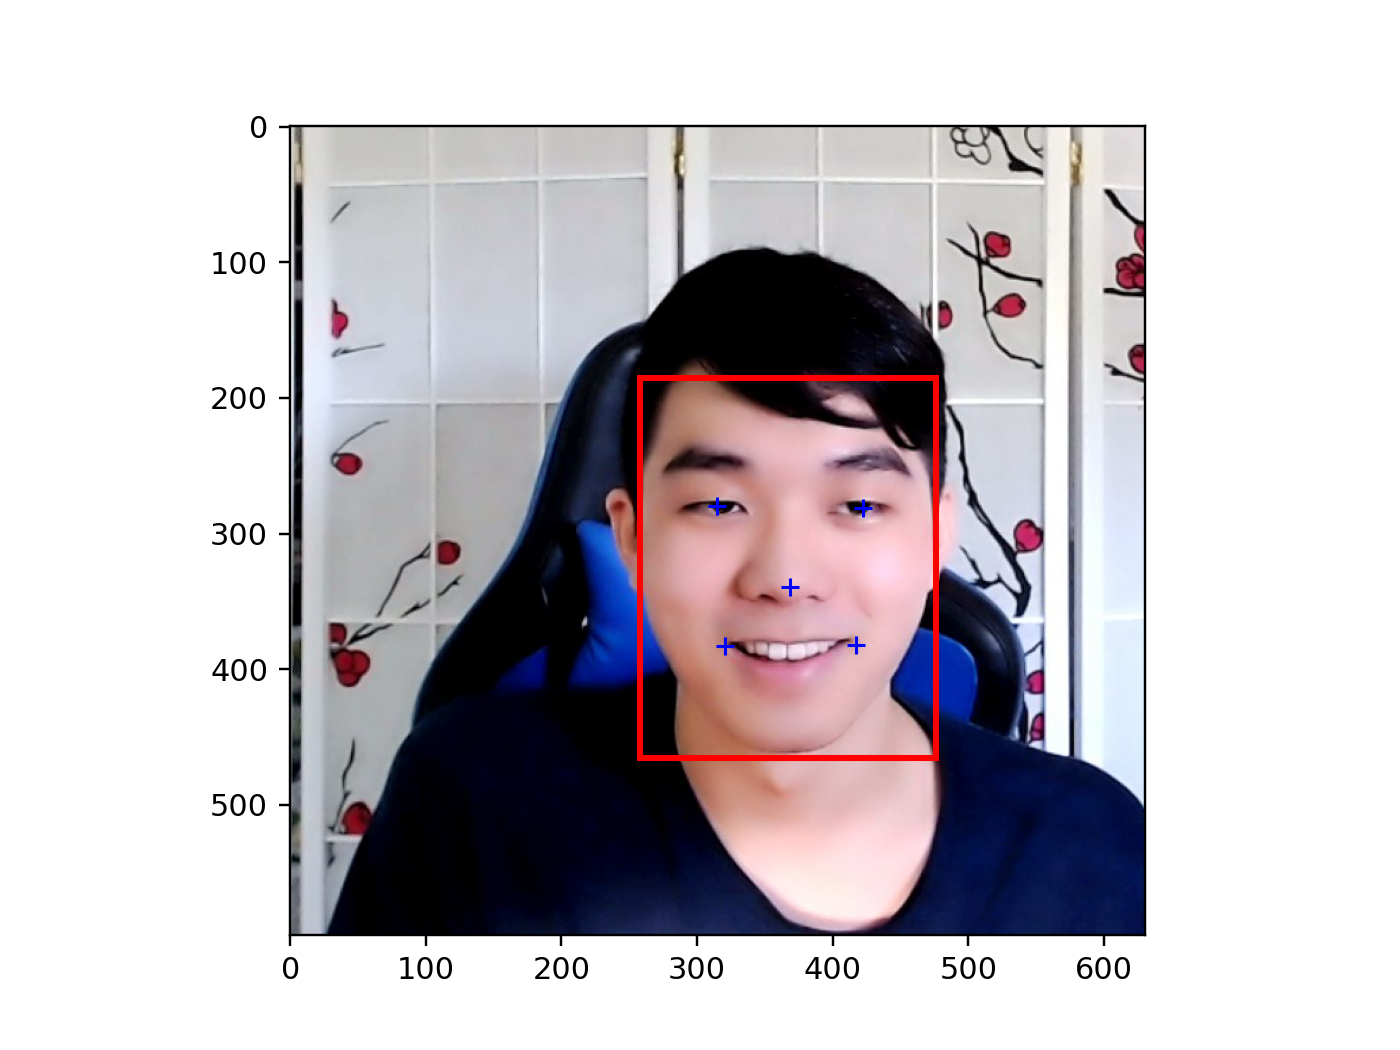

In [117]:
# SHOWING FACE RECTANGLES
from matplotlib.patches import Rectangle

fig, ax = plt.subplots()
ax.imshow(pic2)


for box, prob, landmark in zip(boxes2, probabilities2, landmarks2):
    # draw the box on the screen
    ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))

    # Get the landmarks/parts for the face in box d.
    # Draw the face landmarks on the screen.
    for i in range(len(landmark)):
        ax.plot(landmark[i, 0], landmark[i, 1], "+", color="blue")

In [118]:
# let's take a look as to what the descriptor is!!
descriptor2 = model.compute_descriptors(pic2, boxes2) # Producing the descriptor vector
descriptor2 = descriptor2.reshape(512)
print(descriptor2.shape)
print(descriptor2)

(512,)
[ 2.17989124e-02 -1.69994943e-02  1.25711011e-02  7.46392412e-03
  3.75591107e-02  4.68121096e-02 -6.67002797e-02 -3.89146283e-02
  4.40226775e-03  5.17967902e-02  6.49606511e-02  4.69323397e-02
 -2.26776060e-02 -2.22669784e-02 -6.91092527e-03 -5.39913811e-02
  3.28123830e-02  3.52440476e-02 -6.37505800e-02  4.08925116e-02
  2.24511046e-02  1.08714057e-02  3.57354581e-02 -7.42072538e-02
 -7.17695802e-02  6.44464567e-02 -4.40669572e-03  1.56783275e-02
 -2.80465987e-02 -4.82820952e-03 -5.42641105e-03  8.10967237e-02
  3.32630868e-03  7.51121789e-02  6.32263534e-03 -4.72006425e-02
 -8.13315287e-02 -1.14927381e-01 -9.89736393e-02  6.46777824e-02
  5.21551352e-03 -5.52595779e-02 -5.83533086e-02 -7.27365073e-03
 -3.40615660e-02  2.46120859e-02  4.55218107e-02  2.80247889e-02
 -2.36099232e-02 -6.09407872e-02 -1.52180614e-02 -6.50321022e-02
  9.14364979e-02  5.95247522e-02  6.74505904e-02 -1.73941981e-02
 -4.94341180e-02  8.58399570e-02  2.47274134e-02  3.02617028e-02
  1.48184819e-03  

## Comparing the two faces

In [119]:
import numpy as np
import mygrad as mg

In [120]:
def cos_distance(d_avg, d_test):
    d_avg_normalized = d_avg / np.linalg.norm(d_avg)
    d_test_normalized = d_test / np.linalg.norm(d_test)
    
    # print(d_avg_normalized)
    # print(d_test_normalized)
    
    numerator = np.dot(d_avg_normalized, d_test_normalized)
    d_avg_mag = np.sqrt(np.dot(d_avg_normalized, d_avg_normalized))
    d_test_mag = np.sqrt(np.dot(d_test_normalized, d_test_normalized))
    
    return 1 - numerator # / (d_avg_mag * d_test_mag)

In [121]:
cos_dist = cos_distance(descriptor, descriptor2)
print(cos_dist)

0.05677264928817749
